<a href="https://colab.research.google.com/github/nikocarba/Python/blob/main/Copia_de_Ejercicio_T%C3%A9cnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicion Técnico

A continuación presentaremos algunos ejercicios a desarrollar en Python. Cada ejercicio es independiente del otro, sin embargo, tengan cuidado con el nombre de las variables (para esta herramienta, todo lo que escriban es parte del mismo "programa")

+info: https://colab.research.google.com/notebooks/intro.ipynb

## Tu nombre villano

Creá una función que devuelva tu nombre en "villano" basada en la fecha de tu cumpleaños (se asume que la fecha recibida es una fecha válida) y tu nombre. Las reglas para la conversión son las siguientes:

**Nombre -> Mes de nacimiento**

* Enero -> "The Evil"
* Febrero -> "The Vile"
* Marzo -> "The Cruel"
* Abril -> "The Trashy"
* Mayo -> "The Despicable"
* Junio -> "The Embarrassing"
* Julio -> "The Disreputable"
* Agosto -> "The Atrocious"
* Septiembre -> "The Twirling"
* Octubre -> "The Orange"
* Noviembre -> "The Terrifying"
* Diciembre -> "The Awkward"

**Segundo nombre -> Tu nombre de atrás hacia adelante**

Ejemplo:
* Sofia -> Aifos

**Apellido -> Último dígito del día de Nacimiento**

* 0 -> "Mustache"
* 1 -> "Pickle"
* 2 -> "Hood Ornament"
* 3 -> "Raisin"
* 4 -> "Recycling Bin"
* 5 -> "Potato"
* 6 -> "Tomato"
* 7 -> "House Cat"
* 8 -> "Teaspoon"
* 9 -> "Laundry Basket"

In [2]:
import datetime

mapeo_mes = {
  1 : "The Evil",
  2 : "The Vile",
  3 : "The Cruel",
  4 : "The Trashy",
  5 : "The Despicable",
  6 : "The Embarrassing",
  7 : "The Disreputable",
  8 : "The Atrocious",
  9 : "The Twirling",
  10 : "The Orange",
  11 : "The Terrifying",
  12 : "The Awkward"
}

mapeo_digito = {
  '0' : "Mustache",
  '1' : "Pickle",
  '2' : "Hood Ornament",
  '3' : "Raisin",
  '4' : "Recycling Bin",
  '5' : "Potato",
  '6' : "Tomato",
  '7' : "House Cat",
  '8' : "Teaspoon",
  '9' : "Laundry Basket"    
}

def get_villain_name(name, birthdate):
  return mapeo_mes[birthdate.month] + ' ' + name[::-1].capitalize() + ' ' + mapeo_digito[str(birthdate)[-1]]

Pruebas:

In [3]:
print(get_villain_name('Sofia', datetime.date(2000,1,1)) == "The Evil Aifos Pickle")
print(get_villain_name('Tomi', datetime.date(1998,3,1)) == "The Cruel Imot Pickle")
print(get_villain_name('Cota', datetime.date(1996,8,25)) == "The Atrocious Atoc Potato")

True
True
True


## Ahorcado

https://es.wikipedia.org/wiki/Ahorcado_(juego)

En este punto se pide implementar una versión del conocido juego *Ahorcado*.
El programa debe cumplir los siguientes puntos:
1. Primero pide a un jugador la palabra a adivinar por input.
2. Después toma las letras que elige el otro jugador por input también.
3. El jugador tiene 5 vidas, si las pierde todas, pierde.
4. Se tiene que ir mostrando el avance del juego, mostrando las letras ya probadas y como se va completando la palabra a adivinar

Por ejemplo: 
>* `letras usadas: a,o,p` 
>* `estado de la palabra a adivinar: _o_a`

In [ ]:
import os
import re

print('Ingrese palabra: ')

word = input().lower()
letter_state = {x:0 for x in word}
letters = ['_' for _ in range(len(word))]

used_letters = set()
lives = 5

def find_index(word, ch):     
  return [i for i, ltr in enumerate(word) if ltr == ch]

while True:
  print('Ingrese letra: ')
  letter_input = input().lower().strip()

  if not re.fullmatch(r"[a-zA-Z]", letter_input):
   print('Input incorrecto')
   continue

  if letter_input in word:         
    for indice in find_index(word, letter_input):
      letter_state[letter_input] = 1
      letters[indice] = letter_input
    used_letters.add(letter_input)

    if sum(letter_state.values()) == len(letter_state):
      print('Adivinaste la palabra!')
      break

  else:
    lives -=1
    if not lives:
      print('Perdiste!')
      break
    used_letters.add(letter_input)

  print('------------')
  print('letras usadas:', used_letters)
  print('estado de la palabra a adivinar:', letters) 

## Parseo de enteros
Implementar una función que dado un string devuelva el número entero correspondiente o None si el string no es válido.

Formato:


*   \- o + al principio (opcional)
*   Prefijo: 0b (binario), 0x (hexadecimal), 0o (octal) o nada si es decimal
*   Resto de los dígitos (dependiendo de la base)

Si el string contiene cualquier otro caracter, entonces no es válido

Los dígitos pueden estar en mayúscula o minúscula. Los prefijos siempre son en minúscula.

Podés usar cualquier función de las bibliotecas standard de Python

In [5]:
def to_integer(string):  
  if re.fullmatch('[+-]?0x[1-9A-Fa-f]+', string):
    return int(string, 16)
  elif re.fullmatch('[+-]?0b[0-1]+', string):
    return int(string, 2)
  elif re.fullmatch('[+-]?0o[1-7]+', string):
    return int(string, 8)
  elif re.fullmatch('[+-]?[0-9]+', string):
    return int(string)
  else:
    return None

Pruebas:

In [6]:
print(f"Test 123 passed: {to_integer('123') == 123}")
print(f"Test 0x123 passed: {to_integer('0x123') == 0x123}")
print(f"Test 0o123 passed: {to_integer('0o123') == 0o123}")
print(f"Test 0123 passed: {to_integer('0123') == 123}")
print(f"Test 123  passed: {to_integer('123 ') == None}")
print(f"Test  123 passed: {to_integer(' 123') == None}")
print(f"Test 0b1010 passed: {to_integer('0b1010') == 0b1010}")
print(f"Test +123 passed: {to_integer('+123') == 123}")
print(f"Test -123 passed: {to_integer('-123') == -123}")
print(f"Test 0B1010 passed: {to_integer('0B1010') == None}")
print(f"Test 0b12 passed: {to_integer('0b12') == None}")
print(f"Test -0x123 passed: {to_integer('-0x123') == -0x123}")
print(f"Test -0o123 passed: {to_integer('-0o123') == -0o123}")
print(f"Test -0123 passed: {to_integer('-0123') == -123}")
test = "123\n"
print(f"Test {repr(test)} passed: {to_integer(test) == None}")
test = "\n123"
print(f"Test {repr(test)} passed: {to_integer(test) == None}")
print(f"Test -0b1010 passed: {to_integer('-0b1010') == -0b1010}")
print(f"Test 0xDEADbeef passed: {to_integer('0xDEADbeef') == 0xDEADBEEF}")
print(f"Test 0X123 passed: {to_integer('0X123') == None}")
print(f"Test 0O123 passed: {to_integer('0O123') == None}")
print(f"Test 0o18 passed: {to_integer('0o18') == None}")

Test 123 passed: True
Test 0x123 passed: True
Test 0o123 passed: True
Test 0123 passed: True
Test 123  passed: True
Test  123 passed: True
Test 0b1010 passed: True
Test +123 passed: True
Test -123 passed: True
Test 0B1010 passed: True
Test 0b12 passed: True
Test -0x123 passed: True
Test -0o123 passed: True
Test -0123 passed: True
Test '123\n' passed: True
Test '\n123' passed: True
Test -0b1010 passed: True
Test 0xDEADbeef passed: True
Test 0X123 passed: True
Test 0O123 passed: True
Test 0o18 passed: True


## Ejercicio XPaths

Este ejercicio consta de extraer datos de un .html (adjuntado en el mail) utilizando [XPaths](https://www.w3schools.com/xml/xpath_intro.asp)

Se pide:
* Extraer la cantidad de resultados de la búsqueda
* Contar la cantidad de links que hay en total
* Contar cuántas imágenes hay en el recuadro superior de la derecha (sólo las que están arriba del nombre)
* Imprimir los títulos de cada resultado, utilizando la función `clean_title` ya definida (no la modifiques!)

In [ ]:
def clean_title(title):
  new_title = title.split('|')[0]
  new_title = new_title.split('-')[0]
  return new_title

from google.colab import files
import io

print("Subir el archivo google.html\n")
uploaded = files.upload()
html_file = io.BytesIO(uploaded['google.html'])

from bs4 import BeautifulSoup

In [186]:
#Extraer la cantidad de resultados de la búsqueda
soup = BeautifulSoup(html_file.getvalue(), 'html.parser')

results = soup.find_all('div', class_='cbphWd')
results[0].text

titulos = []



#resultados busqueda
for div in soup.find_all('div', class_='hlcw0c'):
  for result in div.find_all('h3', class_='LC20lb DKV0Md'):
    titulos.append(result.text)

#anuncios de la busqueda
results = soup.find_all('div', class_='qGXjvb') 
for result in results:
  title = result.find('div', class_='cfxYMc JfZTW c4Djg MUxGbd v0nnCb')
  titulos.append(title.text)

print('La busqueda devolvio un total de', len(titulos), 'resultados.')

la busqueda devolvio un total de 10 resultados.


In [182]:
#Contar la cantidad de links que hay en total
links = []

results = soup.find_all('div', class_='yuRUbf')
for result in results:
  links.append(result.a['href'])

print('Hay un total de', len(set(links)), 'links')

Hay un total de 11 links


In [208]:
#Contar cuántas imágenes hay en el recuadro superior de la derecha (sólo las que están arriba del nombre)

results = soup.find('div', class_='sATSHe')
a = results.find_all('div', class_='eA0Zlc ivg-i PtaMgb PZPZlf')
print('Hay', len(a), 'imagenes') 

#Hay una imagen que esta oculta y no aparece

hay 8 imagenes


In [203]:
#Imprimir los títulos de cada resultado, utilizando la función clean_title ya definida (no la modifiques!)

titulos_limpios = map(clean_title, titulos)
list(titulos_limpios)

['Ada Lovelace ',
 'Ada Lovelace: la primera programadora ',
 'Ada Byron: Condesa de Lovelace (1815',
 'Biografía de Ada Lovelace ',
 'Así fue como Ada Lovelace ayudó a crear la informática ...',
 'Ada Lovelace: Mujeres de la Ciencia en EL PAÍS',
 'Ada Lovelace, la visionaria hija de Lord Byron',
 'Ada Lovelace, la matemática que allanó el camino para la ...',
 'ADA BYRON',
 'Ada Lovelace ']

## Ejercicio Pandas (opcional)

https://en.wikipedia.org/wiki/Pandas_(software)

Este ejercico está enfocado en el uso de Pandas (una biblioteca muy usada de Python)
Se tiene dos datasets (enviados por mail):
* Uno contiene las órdenes hechas a un cierto restaurant. Tenemos los campos order_id, product_id y order_date. 
* El otro dataset es el maestro de productos de ese restaurant. Contiene product_id y name (nombre del producto)
Se pide calcular:
1. El nombre del producto más vendido en general
2. El nombre del producto más vendido en cada mes
3. Cantidad promedio de productos por orden (order_id) 
4. Opcional: Cualquier otra cosa que te dé curiosidad calcular :)

Es requisito usar la librería **Pandas** para obtener las respuestas.


Ejecutá la celda de abajo para cargar los archivos y los dataframes


In [ ]:
import pandas as pd
from google.colab import files
import io

print("Subir el archivo orders_dataset.csv\n")
uploaded = files.upload()
df_orders = pd.read_csv(io.BytesIO(uploaded['orders_dataset.csv']))

print("Subir el archivo product_names.csv\n")
uploaded = files.upload()
df_product_names = pd.read_csv(io.BytesIO(uploaded['product_names.csv']))

In [90]:
#1. El nombre del producto más vendido en general. 952642

mas_vendido = df_orders.groupby(by='PRODUCT_ID')['PRODUCT_ID'].count().sort_values(ascending=False).index[0]

df_product_names[df_product_names['PRODUCT_ID'] == mas_vendido]

,PRODUCT_ID,NAME
54,952642,Cajita Feliz Hamburguesa


In [99]:
#2. El nombre del producto más vendido en cada mes

df_orders['ORDER_DATE'] = pd.to_datetime(df_orders['ORDER_DATE'])
df_orders['MONTH'] = df_orders['ORDER_DATE'].dt.month

grouped_orders = df_orders.pivot_table(index= ['MONTH', 'PRODUCT_ID'], values='ORDER_ID', aggfunc='count').reset_index()
grouped_orders.rename(columns={'ORDER_ID':'COUNT'} ,inplace=True)

def get_max(df, month):
  max = df[df['MONTH']==month]['COUNT'].max()
  return df[(df['MONTH']==month) & (df['COUNT'] == max)]

In [100]:
df_product_names.merge(get_max(grouped_orders, 7))

,PRODUCT_ID,NAME,MONTH,COUNT
0,952629,McCombo - McNuggets Mediano x 10,7,2
1,1437306,Sándwich Cuarto de Libra + Papas,7,2
2,1221551,McFlurry XXL Oreo,7,2


In [101]:
df_product_names.merge(get_max(grouped_orders, 8))

,PRODUCT_ID,NAME,MONTH,COUNT
0,952642,Cajita Feliz Hamburguesa,8,32


In [121]:
#3. Cantidad promedio de productos por orden (order_id)
import numpy as np

print('Hay un promedio de', round(np.mean(df_orders.groupby(by='ORDER_ID')['PRODUCT_ID'].count()), 3), 'productos por orden')

Hay un promedio de 1.529 productos por orden


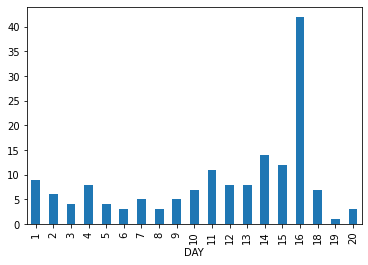

In [116]:
#4. Ventas del mes de Agosto

df_orders['ORDER_DATE'] = pd.to_datetime(df_orders['ORDER_DATE'])
df_orders['DAY'] = df_orders['ORDER_DATE'].dt.day

ventas_agosto = df_orders[df_orders['MONTH'] == 8]
ventas_por_dia = ventas_agosto.groupby(['DAY', 'ORDER_ID']).count().reset_index().groupby('DAY')['ORDER_ID'].count()

ventas_por_dia.plot.bar()